In [1]:
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from PSR import sd_sr, prob_sharpe

[*********************100%***********************]  18 of 18 completed


<Axes: title={'center': 'Asset Correlation Heatmap'}, xlabel='Ticker', ylabel='Ticker'>

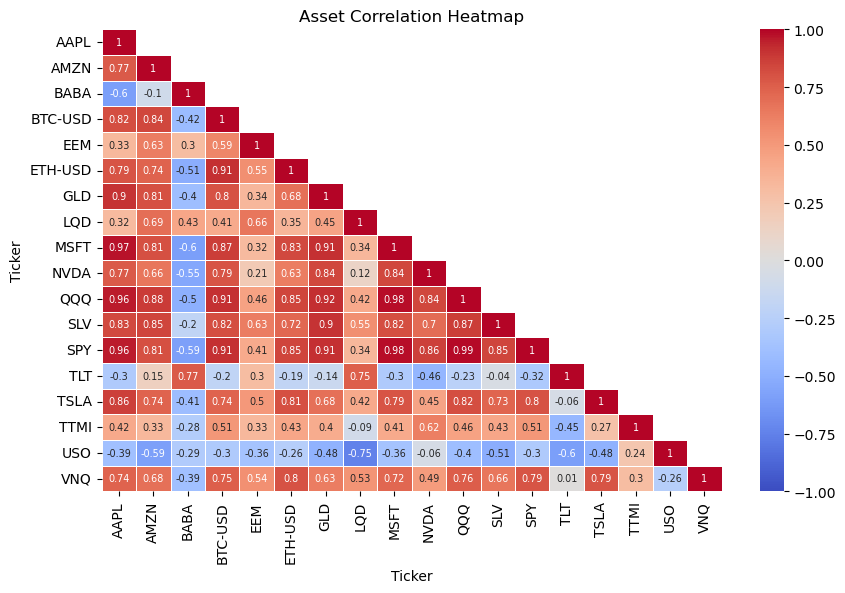

In [7]:
tickers = ['AAPL','AMZN','MSFT','NVDA','TSLA','BABA','TTMI','SPY','QQQ','VNQ','EEM','TLT','LQD','GLD','SLV','USO','BTC-USD','ETH-USD']
data = yf.download(tickers,interval='1d',start='2018-01-01')
df = pd.DataFrame(data)
df = df['Adj Close'].dropna(how='all')
corr = df.corr().round(decimals=2)
mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)
plt.figure(figsize=(10,6))
plt.title('Asset Correlation Heatmap')
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=0.5, vmin=-1, vmax=1,mask=mask,annot_kws={'fontsize':'x-small'})

/var/folders/y_/_grw67fs17q7m8576cdd6gb00000gn/T/ipykernel_9705/3607733574.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df.pct_change().dropna(how='all')


pandas.core.series.Series

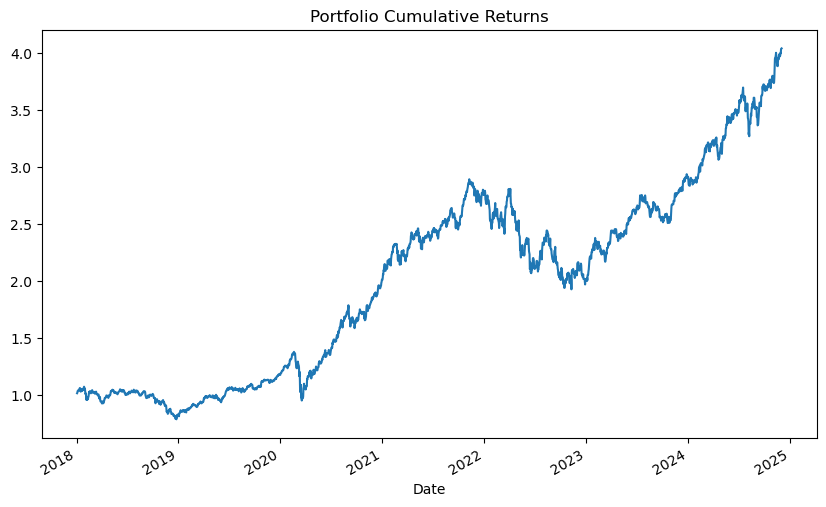

In [3]:
if not df.empty:
    returns = df.pct_change().dropna(how='all')
    #Equally weighted portfolio
    weight = [1/len(tickers)] * len(tickers)
    portfolio_returns = returns.dot(weight)
    cum_returns = (1 + portfolio_returns).cumprod()
cum_returns.plot(title="Portfolio Cumulative Returns", figsize=(10, 6))
type(portfolio_returns)

Text(0, 0.5, 'Density')

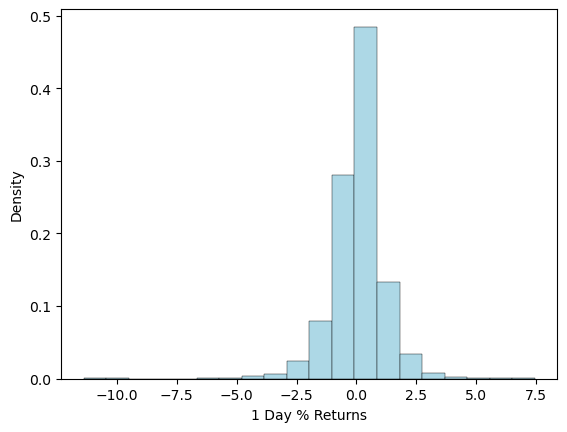

In [4]:
plt.hist(portfolio_returns*100, bins=20, color='lightblue', edgecolor='black', linewidth=0.3,density=True)
plt.xlabel('1 Day % Returns')
plt.ylabel('Density')

In [5]:
cum_returns == cum_returns - 100
cum_returns = pd.DataFrame(cum_returns).dropna()
portfolio_returns = portfolio_returns.dropna()
sd_sr(portfolio=portfolio_returns)

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>


Ticker
^TNX    1.017216
dtype: float64